In [7]:
# import libraries
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.linear_model import LinearRegression
import numpy as np

In [8]:
# Load the data from website (top-rate movie data)
API_KEY='*********'
access_token='*****'
params={}
headers={'Authorization: Bearer <<'+access_token+'>>' }
url='https://api.themoviedb.org/3/movie'#/{movie_id}?api_key=<<'+ API_KEY+''>>&language=en-US'

In [9]:
# page from 1 to 49
num=list(range(1,50))

In [10]:
# create Funtion to get each page data 
def get_site(num):
    html =' https://api.themoviedb.org/3/movie/top_rated?api_key=00fd287adb0566e00239074878cd6e54&language=en-US&page={}'.format(num)
    r = requests.get(html)  
    return r.json()

In [11]:
#loop each page to collect 49 pages top-rate movie data
movies=[]
for i in num:
    movies.append(get_site(i))


In [12]:
#check the length of the data
len(movies)

49

In [13]:
#'movies' and copy the original data 
movie_list=movies[1:].copy()
movie_list

[{'page': 2,
  'total_results': 6874,
  'total_pages': 344,
  'results': [{'popularity': 33.74,
    'vote_count': 6245,
    'video': False,
    'poster_path': '/iiZZdoQBEYBv6id8su7ImL0oCbD.jpg',
    'id': 324857,
    'adult': False,
    'backdrop_path': '/uUiId6cG32JSRI6RyBQSvQtLjz2.jpg',
    'original_language': 'en',
    'original_title': 'Spider-Man: Into the Spider-Verse',
    'genre_ids': [28, 12, 16, 35, 878],
    'title': 'Spider-Man: Into the Spider-Verse',
    'vote_average': 8.4,
    'overview': 'Miles Morales is juggling his life between being a high school student and being a spider-man. When Wilson "Kingpin" Fisk uses a super collider, others from across the Spider-Verse are transported to this dimension.',
    'release_date': '2018-12-06'},
   {'popularity': 19.579,
    'vote_count': 5725,
    'video': False,
    'poster_path': '/81d8oyEFgj7FlxJqSDXWr8JH8kV.jpg',
    'id': 539,
    'adult': False,
    'backdrop_path': '/3md49VBCeqY6MSNyAVY6d5eC6bA.jpg',
    'original_lang

In [14]:
# to check each column's path 
#print
#movie_list[1]['results'][0]['id'],
#movie_list[1]['results'][0]['title'],
#(movie_list[1]['results'][0]['popularity'],
#movie_list[1]['results'][0]['vote_count'],
# movie_list[1]['results'][0]['vote_average'],
# movie_list[1]['results'][0]['release_date'],
# movie_list[1]['results'][0]['genre_ids'])


In [121]:
# get the movie ID data
IDs=[]

for i in range(0,len(movie_list)):
    if 'results' not in movie_list[i].keys():
        IDs.append(None)
    else:
        for j in movie_list[i]['results']:
            if 'id' not in j.keys():
                IDs.append(None)
            else:
                IDs.append(j['id'])
IDs[:5]

[324857, 539, 550, 510, 11216]

In [122]:
# get the movie title data
titles=[]
for i in range(0,len(movie_list)):
    if 'results' not in movie_list[i].keys():
        titles.append(None)
    else:
        for j in movie_list[i]['results']:
            if 'title' not in j.keys():
                titles.append(None)
            else:
                titles.append(j['title'])
len(titles)

960

In [123]:
# get the movie 'popularity' data
popularity=[]
for i in range(0,len(movie_list)):
    if 'results' not in movie_list[i].keys():
        popularity.append(None)
    else:
        for j in movie_list[i]['results']:
            if 'popularity' not in j.keys():
                popularity.append(None)
            else:
                popularity.append(j['popularity'])
len(popularity)

960

In [124]:
# get the movie vote_count data
vote_count=[]
for i in range(0,len(movie_list)):
    if 'results' not in movie_list[i].keys():
        vote_count.append(None)
    else:
        for j in movie_list[i]['results']:
            if 'vote_count' not in j.keys():
                vote_count.append(None)
            else:
                vote_count.append(j['vote_count'])
len(vote_count)

960

In [125]:
# get the movie vote_average data
vote_average=[]
for i in range(0,len(movie_list)):
    if 'results' not in movie_list[i].keys():
        vote_average.append(None)
    else:
        for j in movie_list[i]['results']:
            if 'vote_average' not in j.keys():
                vote_average.append(None)
            else:
                vote_average.append(j['vote_average'])
len(vote_average)

960

In [126]:
# get the movie relaese_date data
release_date=[]
for i in range(0,len(movie_list)):
    if 'results' not in movie_list[i].keys():
        release_date.append(None)
    else:
        for j in movie_list[i]['results']:
            if 'release_date' not in j.keys():
                release_date.append(None)
            else:
                release_date.append(j['release_date'])
len(release_date)




960

In [127]:
# get the movie genre_id data
genre_ids=[]
for i in range(0,len(movie_list)):
    if 'results' not in movie_list[i].keys():
        genre_ids.append(None)
    else:
        for j in movie_list[i]['results']:
            if 'genre_ids' not in j.keys():
                genre_ids.append(None)
            else:
                genre_ids.append(j['genre_ids'])
len(genre_ids)

960

In [128]:
# create a funtion using movie_id to collect movie genres/budget/imdb_id
def movie_info(num):
    html ='https://api.themoviedb.org/3/movie/{}?api_key=00fd287adb0566e00239074878cd6e54&language=en-US'.format(num)
    r = requests.get(html)  
    return r.json()

In [129]:
#get top rate movies id and budget/revenue/production_companies/runtime
#/"runtime"/,"vote_average"/ "vote_count"
movies_information=[]
for i in IDs:
    movies_information.append(movie_info(i))
    
movies_information

[{'adult': False,
  'backdrop_path': '/uUiId6cG32JSRI6RyBQSvQtLjz2.jpg',
  'belongs_to_collection': {'id': 573436,
   'name': 'Spider-Man: Spider-Verse Collection',
   'poster_path': '/eD4bGQNfmqExIAzKdvX5gDHhI2.jpg',
   'backdrop_path': '/14F6gMaRjzgsN6EEpiwH87R1I00.jpg'},
  'budget': 90000000,
  'genres': [{'id': 28, 'name': 'Action'},
   {'id': 12, 'name': 'Adventure'},
   {'id': 16, 'name': 'Animation'},
   {'id': 878, 'name': 'Science Fiction'},
   {'id': 35, 'name': 'Comedy'}],
  'homepage': 'http://www.intothespiderverse.movie',
  'id': 324857,
  'imdb_id': 'tt4633694',
  'original_language': 'en',
  'original_title': 'Spider-Man: Into the Spider-Verse',
  'overview': 'Miles Morales is juggling his life between being a high school student and being a spider-man. When Wilson "Kingpin" Fisk uses a super collider, others from across the Spider-Verse are transported to this dimension.',
  'popularity': 33.74,
  'poster_path': '/iiZZdoQBEYBv6id8su7ImL0oCbD.jpg',
  'production_compani

In [131]:
#copy the data
movie_information=movies_information.copy()

In [132]:
# to check if the each columns path is correct
print(
movie_information[0]['id'],
movie_information[0]['budget'],
movie_information[0]['revenue'],
movie_information[0]['imdb_id'],
movie_information[0]['production_companies'],
movie_information[0]['runtime'])


324857 90000000 375450417 tt4633694 [{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLuyJFB9A.png', 'name': 'Columbia Pictures', 'origin_country': 'US'}, {'id': 2251, 'logo_path': '/6l16UFSkZ1oPpyBYaILgffFZlTc.png', 'name': 'Sony Pictures Animation', 'origin_country': 'US'}, {'id': 7505, 'logo_path': '/837VMM4wOkODc1idNxGT0KQJlej.png', 'name': 'Marvel Entertainment', 'origin_country': 'US'}, {'id': 14439, 'logo_path': None, 'name': 'Arad Productions', 'origin_country': ''}, {'id': 77973, 'logo_path': None, 'name': 'Lord Miller', 'origin_country': ''}, {'id': 84041, 'logo_path': '/XmHMPGzdI5c4WGX1YlxU4s2v7T.png', 'name': 'Pascal Pictures', 'origin_country': 'US'}, {'id': 34, 'logo_path': '/GagSvqWlyPdkFHMfQ3pNq6ix9P.png', 'name': 'Sony Pictures', 'origin_country': 'US'}] 117


In [133]:
#check what kind of data it contains
movie_information[0].keys()

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [134]:
#runtime data
runtime=[]
for i in range(0,len(movie_information)):
    if 'runtime' not in movie_information[i].keys():
        runtime.append(None)
    else:
        runtime.append(movies_information[i]['runtime'])
len(runtime)

960

In [135]:
#movie_id data
m_info_id=[]
for i in range(0,len(movie_information)):
    if 'id' not in movie_information[i].keys():
        m_info_id.append(None)
    else:
        m_info_id.append(movie_information[i]['id'])
len(m_info_id)
#m_info_id

960

In [136]:
#budget data

m_info_budget=[]
for i in range(0,len(movie_information)):
    if 'budget' not in movie_information[i].keys():
        m_info_budget.append(None)
    else:
        m_info_budget.append(movie_information[i]['budget'])
m_info_budget

[90000000,
 806948,
 63000000,
 3000000,
 0,
 3300000,
 3300000,
 1500000,
 0,
 3700000,
 1752000,
 0,
 0,
 20000000,
 2000000,
 18000000,
 24000000,
 0,
 0,
 0,
 26500000,
 0,
 0,
 0,
 1000000,
 935000,
 9000000,
 0,
 0,
 16400000,
 4900000,
 35000000,
 0,
 0,
 0,
 93000000,
 16000000,
 33000000,
 1500000,
 160000000,
 8575000,
 19000000,
 0,
 0,
 0,
 356000000,
 0,
 0,
 3000000,
 79000000,
 0,
 5000000,
 4000000,
 23000000,
 23000000,
 0,
 4000000,
 0,
 165000000,
 300000000,
 55000000,
 0,
 31500000,
 45000000,
 19000000,
 133000,
 250000,
 3000000,
 0,
 13000000,
 3000000,
 2479000,
 3180000,
 0,
 0,
 1400000,
 0,
 20000000,
 6000000,
 92620000,
 11000000,
 0,
 19000000,
 2200000,
 175000000,
 250000,
 9000000,
 0,
 0,
 0,
 5500000,
 0,
 12820000,
 1300000,
 2883848,
 4000000,
 927262,
 0,
 0,
 500000,
 40000000,
 0,
 0,
 1200000,
 2540800,
 0,
 0,
 15000000,
 9000000,
 1800000,
 70000000,
 0,
 0,
 0,
 12000000,
 0,
 49300000,
 0,
 11500000,
 90000000,
 0,
 103000000,
 0,
 1350000,

In [137]:
#revenue data
m_info_revenue=[]
for i in range(0,len(movie_information)):
    if 'revenue' not in movie_information[i].keys():
        m_info_revenue.append(None)
    else:
        m_info_revenue.append(movie_information[i]['revenue'])
m_info_revenue

[375450417,
 32000000,
 100853753,
 108981275,
 11990401,
 30641770,
 13092000,
 19181,
 55240,
 0,
 5000000,
 0,
 20000000,
 23875127,
 11000000,
 538400000,
 236049757,
 0,
 0,
 0,
 159375308,
 0,
 0,
 2693053,
 36764313,
 0,
 0,
 0,
 0,
 235860116,
 3494070,
 120072577,
 0,
 0,
 0,
 871368364,
 45284974,
 327311859,
 8500000,
 825532764,
 37767206,
 272742922,
 0,
 0,
 0,
 2797800564,
 0,
 0,
 9000000,
 926287400,
 0,
 5321508,
 64978931,
 29163535,
 319700000,
 0,
 41063475,
 310407,
 675120017,
 2046239637,
 1071173263,
 0,
 150000000,
 987483777,
 381109762,
 361712,
 2500000,
 25000000,
 0,
 426480871,
 14980005,
 28000000,
 9644124,
 0,
 0,
 150438,
 0,
 0,
 23341568,
 650422,
 775398007,
 0,
 44781695,
 26589000,
 800526015,
 96568,
 39723096,
 112536,
 0,
 0,
 6735118,
 0,
 81927980,
 28262574,
 25000000,
 30000000,
 2500000,
 0,
 0,
 0,
 109676311,
 0,
 19516000,
 2859750,
 7200000,
 0,
 0,
 158526998,
 0,
 9440272,
 321455689,
 0,
 0,
 0,
 140312928,
 0,
 24186232,
 0,
 406

In [138]:
#imdb_id
m_info_imdb_id=[]
for i in range(0,len(movie_information)):
    if 'imdb_id' not in movie_information[i].keys():
        m_info_imdb_id.append(None)
    else:
        m_info_imdb_id.append(movie_information[i]['imdb_id'])

len(m_info_imdb_id)

960

In [139]:
#production_companies
production_companies=[]
for i in range(0,len(movies_information)):
    for j in movies_information[i]['production_companies']:
        production_companies.append({IDs[i]:j['name']})


        
production_companies[:5]

[{324857: 'Columbia Pictures'},
 {324857: 'Sony Pictures Animation'},
 {324857: 'Marvel Entertainment'},
 {324857: 'Arad Productions'},
 {324857: 'Lord Miller'}]

In [140]:
list(production_companies[0].items())[0][0]

324857

In [141]:
# match the production company name with movie_id 
pc_movie_id=[]

for i in production_companies:
    pc_movie_id.append(list(i.items())[0][0])
pc_movie_id[0:5]

[324857, 324857, 324857, 324857, 324857]

In [142]:
# combine all the production companies by the order of movie ids 
pc_name=[]

for i in production_companies:
    pc_name.append(list(i.items())[0][1])
pc_name[0:5]

['Columbia Pictures',
 'Sony Pictures Animation',
 'Marvel Entertainment',
 'Arad Productions',
 'Lord Miller']

In [143]:
# create a dataframe table for movie_id and corresponding company names 
#to check which company shows up more frequenctly 
company_data=pd.DataFrame()
company_data['movie_id']=pc_movie_id
company_data['company_name']=pc_name
company_data

,movie_id,company_name
0,324857,Columbia Pictures
1,324857,Sony Pictures Animation
2,324857,Marvel Entertainment
3,324857,Arad Productions
4,324857,Lord Miller
...,...,...
2904,616,Cruise/Wagner Productions
2905,616,Warner Bros. Pictures
2906,616,Radar Pictures
2907,616,Bedford Falls Productions


In [144]:
# collect all columns into one dataframe which is called df
import numpy as np
df=pd.DataFrame()
df['id']=IDs
df['titles']=titles
df['popularity']=popularity
df['vote_count']=vote_count
df['vote_average']=vote_average
df['year']=list(map(lambda x: int(x[:4]),release_date))
df['movie_id']=m_info_id
df['budget']=m_info_budget
df['revenue']=m_info_revenue
df['imdb_id']=m_info_imdb_id
df['runtime']=runtime
df['genre_id']=genre_ids


In [145]:
# remove naN and copy to get new df1
df1=df.dropna(axis=0).copy()


In [146]:
df1.shape

(959, 12)

In [147]:
#double check if df1 is cleaned
df1.isnull().sum()

id              0
titles          0
popularity      0
vote_count      0
vote_average    0
year            0
movie_id        0
budget          0
revenue         0
imdb_id         0
runtime         0
genre_id        0
dtype: int64

In [148]:
# get the table for genre_id and corresponding movie_id
df_g=pd.DataFrame()
df_g['genre_id']=genre_ids
df_g['movie_id']=df['id']
df_gen=df_g.dropna(axis=0)
df_gen

,genre_id,movie_id
0,"[28, 12, 16, 35, 878]",324857
1,"[18, 27, 53]",539
2,[18],550
3,[18],510
4,"[18, 10749]",11216
...,...,...
955,"[18, 36]",783
956,[878],828
957,"[27, 878]",11549
958,"[28, 18, 36, 10752]",616


In [149]:
# combine all lists in genre_id and map its movie_id
genre_movie=[]

for i in range(0,len(df_gen['genre_id'])):
    for j in df_gen['genre_id'][i] :
        genre_movie.append((df_gen['movie_id'][i],j))
genre_movie
genre_movie_table=pd.DataFrame()
genre_movie_table['movie_id']=list(map(lambda x: x[0],genre_movie))
genre_movie_table['genre_id']=list(map(lambda x: x[1],genre_movie))
genre_movie_table

,movie_id,genre_id
0,324857,28
1,324857,12
2,324857,16
3,324857,35
4,324857,878
...,...,...
2307,616,36
2308,616,10752
2309,522,35
2310,522,18


In [150]:
# Genre ID and its name 
link='https://api.themoviedb.org/3/genre/movie/list?api_key=00fd287adb0566e00239074878cd6e54&language=en-US'
g=requests.get(link).json()
g['genres'][1].items()

dict_items([('id', 12), ('name', 'Adventure')])

In [151]:
g

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

In [152]:
g_id=[]
m=[]
g_type=[]
for j in g['genres']:
    for IDs in j.values():
        m.append(IDs)
        
len(m)

for i in range(0,len(m),2):
            g_id.append(m[i])
print(len(g_id)) 

for q in range(1,len(m),2):
            g_type.append(m[q])
        


19


In [153]:
#get the data for grenre_id and its type
genre_data=pd.DataFrame()
genre_data['genre_id']=g_id
genre_data['type']=g_type
genre_data

,genre_id,type
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [154]:
# create columns for genre_id with value 0 
for i in g_id:
    df1[i] = 0

In [155]:
df1

,id,titles,popularity,vote_count,vote_average,year,movie_id,budget,revenue,imdb_id,...,36,27,10402,9648,10749,878,10770,53,10752,37
0,324857,Spider-Man: Into the Spider-Verse,33.740,6245,8.4,2018,324857,90000000,375450417,tt4633694,...,0,0,0,0,0,0,0,0,0,0
1,539,Psycho,19.579,5725,8.4,1960,539,806948,32000000,tt0054215,...,0,0,0,0,0,0,0,0,0,0
2,550,Fight Club,27.396,18063,8.4,1999,550,63000000,100853753,tt0137523,...,0,0,0,0,0,0,0,0,0,0
3,510,One Flew Over the Cuckoo's Nest,18.536,6194,8.4,1975,510,3000000,108981275,tt0073486,...,0,0,0,0,0,0,0,0,0,0
4,11216,Cinema Paradiso,10.932,2045,8.4,1988,11216,0,11990401,tt0095765,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,783,Gandhi,13.505,1303,7.5,1982,783,22000000,77737889,tt0083987,...,0,0,0,0,0,0,0,0,0,0
956,828,The Day the Earth Stood Still,21.079,558,7.5,1951,828,1200000,0,tt0043456,...,0,0,0,0,0,0,0,0,0,0
957,11549,Invasion of the Body Snatchers,19.058,481,7.5,1956,11549,417000,0,tt0049366,...,0,0,0,0,0,0,0,0,0,0
958,616,The Last Samurai,14.555,3908,7.5,2003,616,140000000,456758981,tt0325710,...,0,0,0,0,0,0,0,0,0,0


In [374]:
#create dummy variable
for i in range(len(df1['genre_id'])):
    for j in genre_data['genre_id']:
        if j in df1['genre_id'][i]:
            df1[j][i] = 1

In [157]:
# double check if we update the dummy variables
df1

,id,titles,popularity,vote_count,vote_average,year,movie_id,budget,revenue,imdb_id,...,36,27,10402,9648,10749,878,10770,53,10752,37
0,324857,Spider-Man: Into the Spider-Verse,33.740,6245,8.4,2018,324857,90000000,375450417,tt4633694,...,0,0,0,0,0,1,0,0,0,0
1,539,Psycho,19.579,5725,8.4,1960,539,806948,32000000,tt0054215,...,0,1,0,0,0,0,0,1,0,0
2,550,Fight Club,27.396,18063,8.4,1999,550,63000000,100853753,tt0137523,...,0,0,0,0,0,0,0,0,0,0
3,510,One Flew Over the Cuckoo's Nest,18.536,6194,8.4,1975,510,3000000,108981275,tt0073486,...,0,0,0,0,0,0,0,0,0,0
4,11216,Cinema Paradiso,10.932,2045,8.4,1988,11216,0,11990401,tt0095765,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,783,Gandhi,13.505,1303,7.5,1982,783,22000000,77737889,tt0083987,...,0,0,0,0,0,0,0,0,0,0
956,828,The Day the Earth Stood Still,21.079,558,7.5,1951,828,1200000,0,tt0043456,...,0,0,0,0,0,0,0,0,0,0
957,11549,Invasion of the Body Snatchers,19.058,481,7.5,1956,11549,417000,0,tt0049366,...,0,0,0,0,0,0,0,0,0,0
958,616,The Last Samurai,14.555,3908,7.5,2003,616,140000000,456758981,tt0325710,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df1.columns

Index([          'id',       'titles',   'popularity',   'vote_count',
       'vote_average',         'year',     'movie_id',       'budget',
            'revenue',      'imdb_id',      'runtime',     'genre_id',
                   28,             12,             16,             35,
                   80,             99,             18,          10751,
                   14,             36,             27,          10402,
                 9648,          10749,            878,          10770,
                   53,          10752,             37],
      dtype='object')

In [170]:
# replace genre_id to genre_type
df1.columns=['id',       'titles',   'popularity',   'vote_count',
       'vote_average',         'year',     'movie_id',       'budget',
            'revenue',      'imdb_id',      'runtime',     'genre_id','Action',
   'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
   'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
   'TV Movie', 'Thriller', 'War', 'Western']

df1.columns

Index(['id', 'titles', 'popularity', 'vote_count', 'vote_average', 'year',
       'movie_id', 'budget', 'revenue', 'imdb_id', 'runtime', 'genre_id',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [171]:
df1.head()

,id,titles,popularity,vote_count,vote_average,year,movie_id,budget,revenue,imdb_id,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,324857,Spider-Man: Into the Spider-Verse,33.740,6245,8.4,2018,324857,90000000,375450417,tt4633694,...,0,0,0,0,0,1,0,0,0,0
1,539,Psycho,19.579,5725,8.4,1960,539,806948,32000000,tt0054215,...,0,1,0,0,0,0,0,1,0,0
2,550,Fight Club,27.396,18063,8.4,1999,550,63000000,100853753,tt0137523,...,0,0,0,0,0,0,0,0,0,0
3,510,One Flew Over the Cuckoo's Nest,18.536,6194,8.4,1975,510,3000000,108981275,tt0073486,...,0,0,0,0,0,0,0,0,0,0
4,11216,Cinema Paradiso,10.932,2045,8.4,1988,11216,0,11990401,tt0095765,...,0,0,0,0,1,0,0,0,0,0


In [179]:
# check if we have any naN
df1.isnull().sum()

id                 0
titles             0
popularity         0
vote_count         0
vote_average       0
year               0
movie_id           0
budget             0
revenue            0
imdb_id            0
runtime            0
genre_id           0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

In [180]:
#order by vote_average high to low top 100 
top100va=df1.sort_values(by='vote_average')[:100]
# merge genre_movie_table and genre_data
gen=pd.merge(genre_movie_table,genre_data,on='genre_id')
# get top 10 genra 
top10_gen=pd.DataFrame(pd.merge(top100va,gen,on='movie_id')[:10])


In [181]:
# generate top 10 genre_type
pd.DataFrame(top10_gen['type']).reset_index().columns=['ranking','Type']
pd.DataFrame(top10_gen['type'])

,type
0,Comedy
1,Drama
2,History
3,Action
4,Thriller
5,Crime
6,Drama
7,Horror
8,Thriller
9,Horror


In [182]:
#most popular genra  to gent the frequency of the type
fre_table=pd.DataFrame(pd.merge(top100va,gen,on='movie_id')['type'].value_counts()).reset_index()
fre_table.columns=['type','frequency']
fre_table[:10] # we can see the most popular genra is Drama 

,type,frequency
0,Drama,65
1,Comedy,29
2,Thriller,21
3,Family,17
4,Adventure,16
5,Romance,14
6,Action,14
7,Animation,13
8,Crime,12
9,Fantasy,10


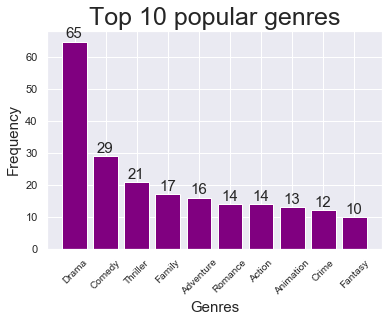

In [183]:
# plt the figure
plt.figure(figsize=(6,4))
plt.bar(fre_table['type'][:10],fre_table['frequency'][:10],color='purple')
plt.xticks(tuple(fre_table['type'][:10]),fontsize=10,rotation=45)
plt.xlabel('Genres',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Top 10 popular genres',fontsize=25)



r = list(range(1,11))

label = list(fre_table['frequency'][:10])

for i in range(len(r)):
    plt.text(x = r[i]-1.29 , y = label[i]+1, s = label[i], size = 15)



plt.show()


# Get the keywords data

In [184]:
#create a funtion to get the keywords for each movie ID
def Get_Keywords(num):
    link1='https://api.themoviedb.org/3/movie/{}/keywords?api_key=00fd287adb0566e00239074878cd6e54'.format(num)
    return requests.get(link1).json()

In [ ]:
#loop the movie ID with the funtion above to get all movieIDs' keywords
keywords_list=[]
for i in df1['id']:
    keywords_list.append(Get_Keywords(i))
   

In [186]:
list_keywords=keywords_list.copy()

In [188]:
#list_keywords[0]['id']
keyword_movie_id1=[]
for i in range(0,len(list_keywords)):
    keyword_movie_id1.append(list_keywords[i]['id'])

len(keyword_movie_id1)

959

In [ ]:
#list_keywords[0]['keywords'][0]['name']
dict_keywords=[]
for i in range(0,len(list_keywords)):
    for j in range(0,len(list_keywords[i]['keywords'])):
        dict_keywords.append({keyword_movie_id1[i]:list_keywords[i]['keywords'][j]['name']})
dict_keyword

In [190]:
# to get the movie_id
keyword_movie_id=[]
for i in range(0,len(dict_keywords)):
            keyword_movie_id.append(list(dict_keywords[i].items())[0][0])
keyword_movie_id[:4]

[324857, 324857, 324857, 324857]

In [191]:
# keyword
keywords=[]
for i in range(0,len(dict_keywords)):
            keywords.append(list(dict_keywords[i].items())[0][1])
keywords[:4]

['superhero', 'based on comic', 'aftercreditsstinger', 'alternate universe']

In [192]:
# to create keyword dataframe corresponding movie_id
kw_df=pd.DataFrame()
kw_df['movie_id']=keyword_movie_id
kw_df['keyword']=keywords
kw_df

,movie_id,keyword
0,324857,superhero
1,324857,based on comic
2,324857,aftercreditsstinger
3,324857,alternate universe
4,539,hotel
...,...,...
10591,522,cult director
10592,522,theremin
10593,522,handgun
10594,522,trick or treating


In [193]:
# To check the popular keywords top 10
kw=pd.DataFrame(kw_df['keyword'].value_counts()).reset_index()
kw.columns=['keyword','frequency']
kw.tail()
kw.head()

,keyword,frequency
0,based on novel or book,111
1,cult film,51
2,biography,47
3,parent child relationship,47
4,murder,44


In [194]:
# to set x's and y's axis
x_axis=list(kw['keyword'][:10])
y_axis=list(kw['frequency'][:10])

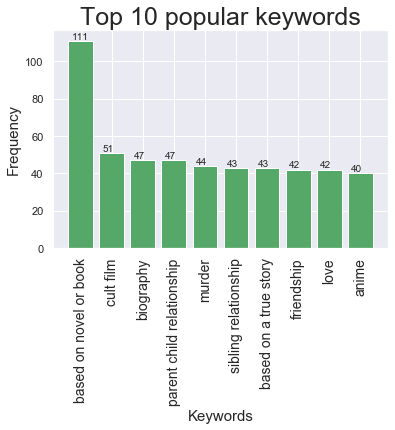

In [195]:
plt.figure(figsize=(6,4))
plt.bar(x_axis,y_axis,color='g')

plt.xticks(fontsize=14, rotation=90)
plt.xlabel('Keywords',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Top 10 popular keywords',fontsize=25)
r = list(range(1,11))

label = list(kw['frequency'][:11])

for i in range(len(r)):
    plt.text(x = r[i]-1.29 , y = label[i]+1, s = label[i], size = 10)



plt.show()


In [196]:
#We can see that  keywords " based on novel or book" is the most popular keyword
kw.iloc[0]

keyword      based on novel or book
frequency                       111
Name: 0, dtype: object

In [197]:
# so the ccorresponding  movie_id's index is 19
list(kw_df['keyword']).index('based on novel or book')

18

In [198]:
#so the index 19th movie id is 510 
kw_df.iloc[19]

movie_id              550
keyword     support group
Name: 19, dtype: object

In [199]:
# we can go back to the dataframe --df1 to see what is the name of the movie

list(df1['id']).index(510)

3

In [203]:
# to see which movies' keywords in top 100 vote_average
# to find the top 100 high vote_average movie in df1
top100va=df1.sort_values(by='vote_average')[:100]
top10kw=pd.DataFrame(pd.merge(top100va,kw_df,on='movie_id')[:10]['keyword'])
top10kw[:3]

,keyword
0,individual
1,taxi
2,transsexuality


# Get the Cast Data

In [208]:
#cast
def Get_Cast(num):
    link2='https://api.themoviedb.org/3/movie/{}/credits?api_key=00fd287adb0566e00239074878cd6e54'.format(num)
    return requests.get(link2).json()

In [397]:
# to get the cast data
cast_list=[]
for i in df1['id']:
    cast_list.append(Get_Cast(i))


In [214]:
list_cast=cast_list.copy()

In [215]:
# get the list for cast name corresponding with movie_id
cast=[]
for i in range(0,len(list_cast)):
    for j in list_cast[i]['cast']:
        cast.append({list_cast[i]['id']:j['name']})

     

In [216]:
#get the movie_id for cast name

cast_movie_id=[]
for i in cast:
    cast_movie_id.append(list(i.items())[0][0])

In [217]:
#get thecast name

cast_name=[]
for i in cast:
    cast_name.append(list(i.items())[0][1])

In [ ]:
#generate the cast name with corresponding movie_id
cast_table=pd.DataFrame()
cast_table['movie_id']=cast_movie_id
cast_table['name']=cast_name
cast_table.head()

In [219]:
# to find the top 100 high vote_average movie in df1
top100va=df1.sort_values(by='vote_average')[:100]
#first,merge the cast_table and top100va 
#second, to convert it into dataframe and get who have highest vote_average
top10name=pd.DataFrame(pd.merge(top100va,cast_table,on='movie_id')['name'][:10])
top10name


,name
0,Johnny Depp
1,Martin Landau
2,Sarah Jessica Parker
3,Patricia Arquette
4,Jeffrey Jones
5,G. D. Spradlin
6,Vincent D'Onofrio
7,Bill Murray
8,Mike Starr
9,Max Casella


In [220]:
# who is the top 3  popular cast
pd.DataFrame(pd.DataFrame(pd.merge(df1,cast_table,on='movie_id'))['name'].value_counts()).iloc[:3]

,name
William H. O'Brien,18
Bess Flowers,18
Samuel L. Jackson,17


In [766]:
df1.columns

Index(['id', 'titles', 'popularity', 'vote_count', 'vote_average', 'year',
       'movie_id', 'budget', 'revenue', 'gross', 'imdb_id', 'runtime',
       'genre_id', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
# get the data for popularity cross the years
yp=pd.DataFrame(df1.groupby('year')['popularity'].mean()).sort_values(by='year',ascending=True).reset_index()
yp.head()

In [222]:
# to obtain the mean of popularity for each year
pop_plot=pd.DataFrame(yp.groupby('year')['popularity'].mean()).reset_index()

Text(0, 0.5, 'Popularity')

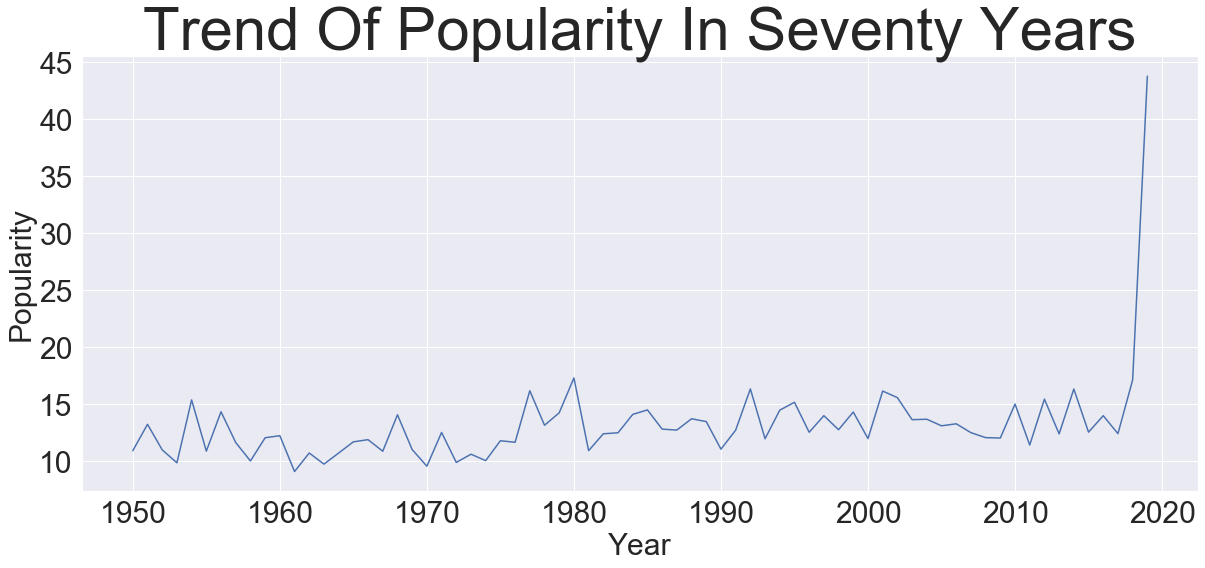

In [381]:
#plot the mean of popularity for each year 
# we can see that trend of movie popularity increases 

plt.figure(figsize=(20,8))
plt.plot('year','popularity',data=pop_plot[30:])
plt.title('trend of Popularity in seventy years'.title(),fontsize=60)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Popularity',fontsize=30)


In [224]:
# increase rate 
increase_rate=[]
for i in range(0,len(pop_plot['popularity'])-1):
    
    increase_rate.append((pop_plot['popularity'][i+1]-pop_plot['popularity'][i])/pop_plot['popularity'][i])
    

# Numerrical Data :
-- *The reason why we did not use profit but revenue , because the data cross the 100 years. The one dollar in 1960 is    different from one dollar in 2019 bacause cashflow affects a lot. 

-- * Most companies care more about furture growth and they need to know the growth of revneue 

--  *if we want to maximize our prifit  the  Marginal Cost = marginal Revenue  so we need to know the relationship         between (cost)budget and revenue 




## 1: Revenue VS popularity

In [226]:
gp=df1[['revenue','popularity']].sort_values(by='popularity',ascending=False).reset_index()
gp.head()

,index,revenue,popularity
0,161,200483309,231.190
1,481,220803003,163.151
2,60,1071173263,138.533
3,105,0,126.896
4,215,0,61.744


In [228]:
#seperate revenue into four levels with different quantiles
rp_y=[gp.iloc[720:]['revenue'].mean(),gp.iloc[480:720]['revenue'].mean(),
      gp.iloc[240:480]['revenue'].mean(),gp.iloc[:240]['revenue'].mean()]

In [229]:
# label names
rp_x=['level 1','level 2','level 3','level 4']

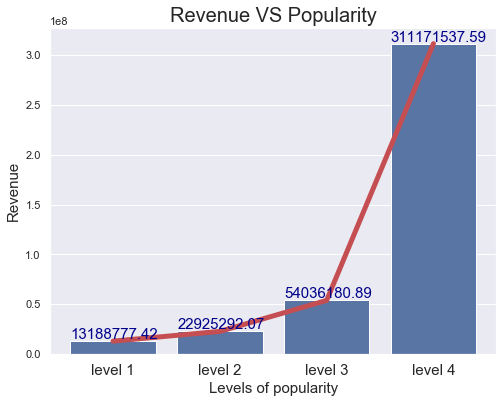

In [382]:
# plot the polularity with different revenue levels
plt.figure(figsize=(8,6))

sns.barplot(rp_x,rp_y,color='b')
sns.lineplot(rp_x,rp_y,linewidth=5,color='r')
plt.title('Revenue VS Popularity',fontsize=20)
plt.ylabel('Revenue',fontsize=15)
plt.xlabel('Levels of popularity',fontsize=15)
plt.xticks(fontsize=15)

r = list(range(0,4))

label = rp_y

for i in range(len(r)):
    plt.text(x = r[i]-0.4 , y = label[i]+2000000, s = round(label[i],2), size = 15,color='darkblue')



plt.show()

 In different level of popularity we can see that  higher popularity a movie is the higher revenue there will be 


## 2: Revenue VS vote_average

In [ ]:
rv=df1[['vote_average','revenue']].sort_values(by='vote_average',ascending=False).reset_index()
rv.head()

In [232]:
#seperate revenue into four levels with different quantiles
rv_y=[rv.iloc[720:]['revenue'].mean(),rv.iloc[480:720]['revenue'].mean(),
      rv.iloc[240:480]['revenue'].mean(),rv.iloc[:240]['revenue'].mean()]

In [233]:
# labels for x axis 
rv_x=['level 1','level 2','level 3','level 4']

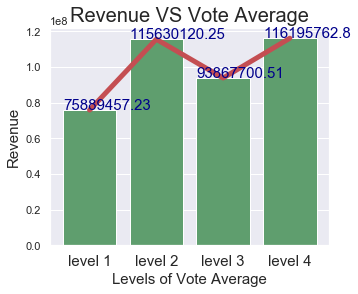

In [383]:
plt.figure(figsize=(5,4))
sns.barplot(rv_x,rv_y,color='g')
sns.lineplot(rv_x,rv_y,linewidth=5,color='r')
plt.title('Revenue VS Vote Average',fontsize=20)
plt.ylabel('Revenue',fontsize=15)
plt.xlabel('Levels of Vote Average',fontsize=15)
plt.xticks(fontsize=15)

r = list(range(0,4))

label = rv_y

for i in range(len(r)):
    plt.text(x = r[i]-0.4 , y = label[i]+100000, s = round(label[i],2), fontsize =15,color='darkblue')



plt.show()

#plt.xlabel('Levels of vote_average',fontsize=20)

# revenue VS runtime

we can see that in different levels of vote average the revenue does have big differences between different levels

In [388]:
rev_run=df1[['revenue','runtime']].sort_values(by='runtime',ascending=False).reset_index()
rev_run

,index,revenue,runtime
0,23,2693053,366.0
1,415,0,317.0
2,222,0,247.0
3,898,0,242.0
4,322,400176459,233.0
...,...,...,...
954,337,0,5.0
955,773,0,5.0
956,55,0,4.0
957,367,0,4.0


In [389]:

rr_y=[rev_run.iloc[720:]['revenue'].mean(),rev_run.iloc[480:720]['revenue'].mean(),
      rev_run.iloc[240:480]['revenue'].mean(),rev_run.iloc[:240]['revenue'].mean()]

In [390]:
rr_x=['level 1','level 2','level 3','level 4']

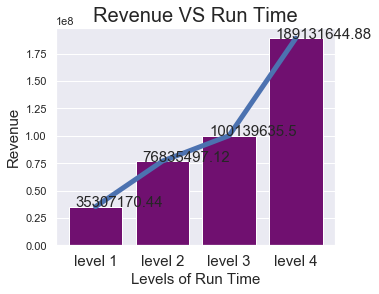

In [391]:
plt.figure(figsize=(5,4))

sns.barplot(rr_x,rr_y,color='purple')
sns.lineplot(rr_x,rr_y,linewidth=5,color='b')
plt.title('Revenue VS Run Time',fontsize=20)
plt.ylabel('Revenue',fontsize=15)
plt.xlabel('Levels of Run Time',fontsize=15)
plt.xticks(fontsize=15)

r = list(range(0,4))

label = rr_y

for i in range(len(r)):
    plt.text(x = r[i]-0.3 , y = label[i]+1, s = round(label[i],2), fontsize = 15)



plt.show()



In [392]:
rb=df1[['revenue','budget']].sort_values(by='budget',ascending=False).reset_index()
rb

,index,revenue,budget
0,45,2797800564,356000000
1,59,2046239637,300000000
2,804,591794936,260000000
3,482,954305868,250000000
4,526,1081041287,250000000
...,...,...,...
954,706,0,0
955,466,0,0
956,467,263404,0
957,703,0,0


In [393]:
rb_y=[rb.iloc[720:]['revenue'].mean(),rb.iloc[480:720]['revenue'].mean()
      ,rb.iloc[240:480]['revenue'].mean(),rb.iloc[:240]['revenue'].mean()]

In [394]:
rb_x=['level 1','level 2','level 3','level 4']

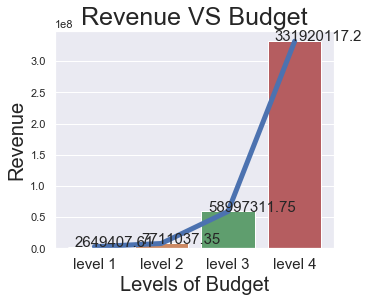

In [395]:
plt.figure(figsize=(5,4))

sns.barplot(rb_x,rb_y)
sns.lineplot(rb_x,rb_y,linewidth=5)
plt.title('Revenue VS Budget',fontsize=25)
plt.ylabel('Revenue',fontsize=20)
plt.xlabel('Levels of Budget',fontsize=20)
plt.xticks(fontsize=15)

r = list(range(0,4))

label = rb_y

for i in range(len(r)):
    plt.text(x = r[i]-0.3 , y = label[i]+200000, s = round(label[i],2), size = 15)



plt.show()



## 3:  Apply machine learning 
###  y = dependent variable  is revenue
### x = independent variable is  
     -vote_average 
     -run_time
     -popularity


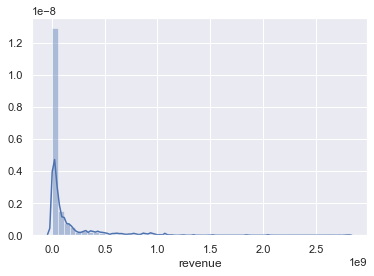

In [238]:
# distribution of revenue , it seems that therea are some outliers 
sns.distplot(df1['revenue'])


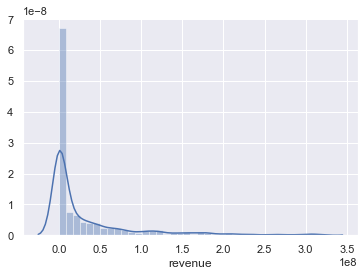

In [239]:
# remove the outliers , but seems that the distribution still have a serious left skew
q1 = df1['revenue'].quantile(0.9)
data_1 =df1[df1['revenue']<q1]
data_1.describe(include='all')
sns.distplot(data_1['revenue'])

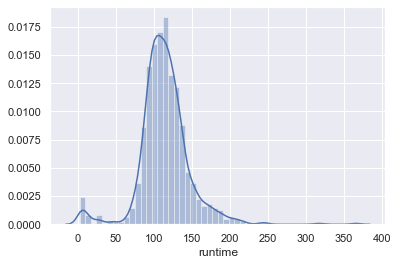

In [240]:
#distribution of runtime. it looks good .
sns.distplot(data_1['runtime'])

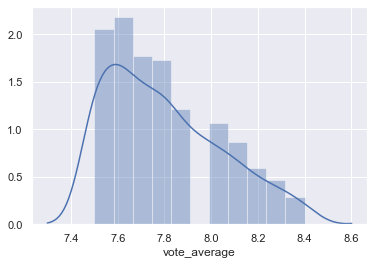

In [241]:
# vote_average distribution  histgram
sns.distplot(data_1['vote_average'])

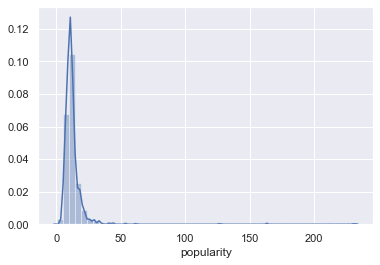

In [242]:
# distribution of popularity 
sns.distplot(data_1['popularity'])

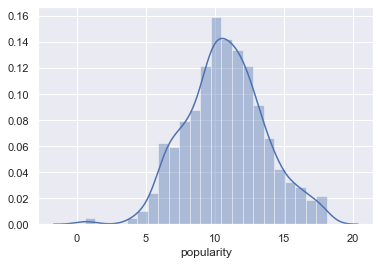

In [243]:
#remove outliers
q2 = data_1['popularity'].quantile(0.9)
data_2 = data_1[data_1['popularity']<q2]
data_2.describe(include='all')
sns.distplot(data_2['popularity'])

In [244]:
# we cleaned up all outliers and get new data called data_3
data_3=data_2.copy().reset_index().drop(columns='index')
data_3.head()

,id,titles,popularity,vote_count,vote_average,year,movie_id,budget,revenue,imdb_id,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,11216,Cinema Paradiso,10.932,2045,8.4,1988,11216,0,11990401,tt0095765,...,0,0,0,0,1,0,0,0,0,0
1,598,City of God,14.603,3820,8.4,2002,598,3300000,30641770,tt0317248,...,0,0,0,0,0,0,0,0,0,0
2,901,City Lights,10.722,1036,8.4,1931,901,1500000,19181,tt0021749,...,0,0,0,0,1,0,0,0,0,0
3,3782,Ikiru,11.436,453,8.4,1952,3782,0,55240,tt0044741,...,0,0,0,0,0,0,0,0,0,0
4,12477,Grave of the Fireflies,0.600,2391,8.4,1988,12477,3700000,0,tt0095327,...,0,0,0,0,0,0,0,0,1,0


In [255]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_3[['revenue','vote_average','budget','runtime','popularity']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,2.133775,revenue
1,26.560841,vote_average
2,2.087169,budget
3,12.990579,runtime
4,17.912279,popularity


In [258]:
# set up variables
y = (np.array(data_3['revenue'])).reshape(-1,1)# 
x1= data_3[['budget','runtime','popularity']]

In [272]:
#import library to standardize our data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x1)
scaler.fit(y)
x_scaled = scaler.transform(x1)
y_scaled=scaler.transform(y)

In [273]:
# We start by creating a linear regression object
reg = LinearRegression()

# The whole learning process boils down to fitting the regression
reg.fit(x_scaled,y_scaled)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[array([2.01934312e+00, 1.37501548e+05, 2.68997144e+06])]

In [282]:
coef_budget=round(reg.coef_[0][0],3)
coef_runtime=round(reg.coef_[0][1],3)
coef_popularity=round(reg.coef_[0][2],3)
print(coef_budget,coef_runtime,coef_popularity)

2.019 137501.548 2689971.439


In [285]:
# Getting the intercept of the regression
intercept=round(reg.intercept_[0],3)
intercept

1502086.849

In [286]:
#Create a dataframe for the results from regression
reg_summary = pd.DataFrame([['Budget'],['Run Time'],['Popularity']], columns=['Features'])

In [287]:
reg_summary['Weights']=[coef_budget,coef_runtime ,coef_popularity]

In [288]:
reg_summary # we can see the budget does not affect revenue a lot 

,Features,Weights
0,Budget,2.019
1,Run Time,137501.548
2,Popularity,2689971.439


# dealling with dummy variables

In [396]:
# obtain the dummy variables from  df1 data 
dummy=df1[['revenue','Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western']]
dummy.head()

,revenue,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,375450417,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,32000000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,100853753,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,108981275,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,11990401,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [309]:
# when we create dummy variables we need set up one colunm is full of zero 
dummy1 = dummy[dummy['Western']==0]

In [362]:
dum_y=scaler.transform(np.array(dummy1['revenue']).reshape(-1,1))
#dummy1['revenue'].apply(lambda x: x/1000000)

dum_x=dummy1[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War']]

In [363]:
#regression for dumx and dumy
reg.fit(dum_x,dum_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [364]:
#get coeff
reg.coef_

array([[ 7.18398282e+14,  1.78629456e+15, -4.86314776e+14,
        -5.34332929e+14,  1.09628898e+14, -7.50000000e-01,
        -2.24829309e+14,  4.75199919e+14,  6.35313344e+13,
        -2.25741913e+14, -1.37477605e+14, -1.32148849e+14,
        -2.29935659e+14,  2.69149124e+13,  1.11805356e+15,
        -1.31500156e+15,  2.07612485e+14,  4.43704889e+14]])

In [365]:
#get intercept
reg.intercept_

array([4.21777314e+14])

In [366]:
list_gre=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War']

In [367]:
gre_list=[]
for i in list_gre:
    gre_list.append([i])
len(gre_list)    

18

In [370]:
#create summary 
reg_summary1 = pd.DataFrame([['Action'],
 ['Adventure'],
 ['Animation'],
 ['Comedy'],
 ['Crime'],
 ['Documentary'],
 ['Drama'],
 ['Family'],
 ['Fantasy'],
 ['History'],
 ['Horror'],
 ['Music'],
 ['Mystery'],
 ['Romance'],
 ['Science Fiction'],
 ['TV Movie'],
 ['Thriller'],
 ['War']], columns=['Features'])

In [371]:
# insert the weights data for each genre
reg_summary1['Weights']=[ 7.18398282e+14,  1.78629456e+15, -4.86314776e+14,
        -5.34332929e+14,  1.09628898e+14, -7.50000000e-01,
        -2.24829309e+14,  4.75199919e+14,  6.35313344e+13,
        -2.25741913e+14, -1.37477605e+14, -1.32148849e+14,
        -2.29935659e+14,  2.69149124e+13,  1.11805356e+15,
        -1.31500156e+15,  2.07612485e+14,  4.43704889e+14]

In [373]:
# sort the data by weights and show the top 5 
reg_summary1.sort_values(by='Weights',ascending=False).reset_index().drop(columns='index').head()

,Features,Weights
0,Adventure,1.786295e+15
1,Science Fiction,1.118054e+15
2,Action,7.183983e+14
3,Family,4.751999e+14
4,War,4.437049e+14


# Top 3 popular company from top rate data (measure with frequency)

In [1683]:
pd.merge(company_data,df1,on='movie_id')['company_name'].value_counts()
# we can see 
# Warner Bros. Pictures    83
# 20th Century Fox         46
# Paramount                45
# Universal Pictures       45
# those four are top 3  popular companies 

Warner Bros. Pictures    83
20th Century Fox         46
Paramount                45
Universal Pictures       45
Columbia Pictures        31
                         ..
Terra Film                1
Medienfonds GFP           1
Slovenian Film Fund       1
Ten Films                 1
Sigma Films               1
Name: company_name, Length: 1586, dtype: int64